In [1]:
%load_ext autoreload
%autoreload 1

%aimport utils
import pandas as pd
import numpy as np
import os
from IPython.display import display, HTML
import matplotlib.pyplot as plt

In [2]:
countries = ['USA', 'Europe', 'JPN']

# Use Sharpe Ratio to measure if the portfolio is optimal
metric = 'sharpe'
po_dict = {}

for country in countries:
    display(HTML('<h2>%s</h2>' % country))

    # Build PortfolioOptimizer
    aqr = utils.load_aqr_data(country).dropna()
    portfolios = utils.build_portfolio(aqr)
    rf = aqr['RF'].dropna()
    mkt = aqr['MKT'].dropna()
    po = utils.PortfolioOptimizer(portfolios=portfolios, riskfree=rf,
                                  market=mkt, country=country)

    # Calculate Sharpe Ratio Per Month Per Portfolio
    display(HTML('<h3>%s</h3>' % metric))
    display(po.get_stats_table(metric=metric).head(3))
    
    # Calculate Optimal Indicator
    display(HTML('<h3>%s</h3>' % 'Indicators'))
    display(po.get_best_indicators().head(3))
    
    # Calculate the best returns by using Optimal Indicator
    display(HTML('<h3>%s</h3>' % 'Optimal Returns'))
    display(po.get_best_returns().head(3))
    
    # Store Optimizer
    po_dict[country] = po
    display(HTML('<hr>'))

,equal_weights,main_QUA,main_SMB,main_HMLFF,main_UMD,heavy_QUA,heavy_SMB,heavy_HMLFF,heavy_UMD
DATE,,,,,,,,,
1957-07-01,-2.879321,-0.530532,-3.750479,-3.358143,-3.540299,1.685316,-3.317260,-2.552402,-2.610759
1957-08-01,0.565690,0.555675,-0.492561,0.488431,0.708762,0.983760,-0.879194,0.685571,0.900232
1957-09-01,4.974207,4.312157,3.114198,3.655563,3.926616,3.005973,2.166092,2.723875,1.964573


,equal_weights,main_QUA,main_SMB,main_HMLFF,main_UMD,heavy_QUA,heavy_SMB,heavy_HMLFF,heavy_UMD
DATE,,,,,,,,,
1957-07-01,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1957-08-01,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1957-09-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DATE
1957-07-01   -0.001061
1957-07-02   -0.000846
1957-07-03    0.000411
dtype: float64

,equal_weights,main_QUA,main_SMB,main_HMLFF,main_UMD,heavy_QUA,heavy_SMB,heavy_HMLFF,heavy_UMD
DATE,,,,,,,,,
1993-07-01,3.091477,0.498894,1.515846,8.647511,0.106059,-0.810666,0.672039,9.778099,-2.143875
1993-08-01,2.813559,2.616765,2.238143,2.618434,-0.262983,2.126367,2.023016,2.253419,-3.086895
1993-09-01,3.716098,2.076929,3.609374,0.943345,6.003587,0.611679,3.324252,-1.100468,8.077502


,equal_weights,main_QUA,main_SMB,main_HMLFF,main_UMD,heavy_QUA,heavy_SMB,heavy_HMLFF,heavy_UMD
DATE,,,,,,,,,
1993-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1993-08-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


DATE
1993-07-01    0.001444
1993-07-02   -0.001395
1993-07-05    0.001236
dtype: float64

,equal_weights,main_QUA,main_SMB,main_HMLFF,main_UMD,heavy_QUA,heavy_SMB,heavy_HMLFF,heavy_UMD
DATE,,,,,,,,,
1993-07-01,-3.402084,-3.869309,-5.955626,-0.827854,-1.426391,-2.656814,-6.365963,1.888870,0.252624
1993-08-01,-3.938427,-3.276163,-3.770629,-5.228075,-1.777660,-1.752651,-3.041733,-4.309772,0.020083
1993-09-01,2.420368,6.191567,1.043314,1.233659,-0.699452,9.283518,-0.166880,0.153973,-3.443716


,equal_weights,main_QUA,main_SMB,main_HMLFF,main_UMD,heavy_QUA,heavy_SMB,heavy_HMLFF,heavy_UMD
DATE,,,,,,,,,
1993-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1993-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1993-09-01,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


DATE
1993-07-01    0.001803
1993-07-02    0.000680
1993-07-05    0.000257
dtype: float64

## Plotting

In [3]:
# Save the plot separately
plot_location = os.path.join(os.getcwd(), '..', 'Plots', 'Factor_Portfolio')

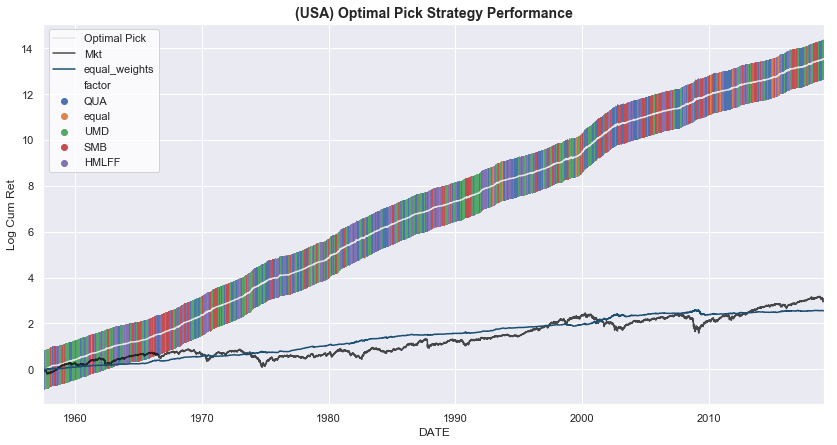

In [4]:
fig, ax = plt.subplots(1,1, figsize=(14, 7))

country = 'USA'
po_dict[country].plot_log_cum_returns(ax)
ax.set_title('(%s) Optimal Pick Strategy Performance'% country,
             fontsize=14, fontweight=700)

fig.savefig(os.path.join(plot_location, 'portfolio_optimal_%s.pdf' % country),
            bbox_inches='tight')

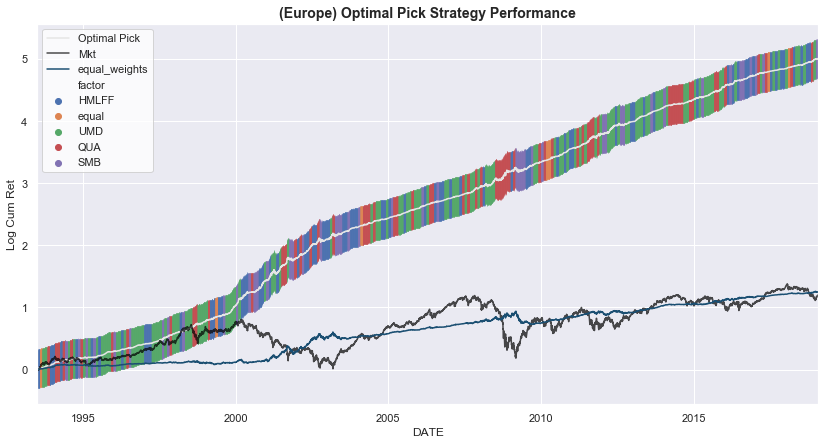

In [5]:
fig, ax = plt.subplots(1,1, figsize=(14, 7))

country = 'Europe'
po_dict[country].plot_log_cum_returns(ax)
ax.set_title('(%s) Optimal Pick Strategy Performance'% country,
             fontsize=14, fontweight=700)

fig.savefig(os.path.join(plot_location, 'portfolio_optimal_%s.pdf' % country),
            bbox_inches='tight')

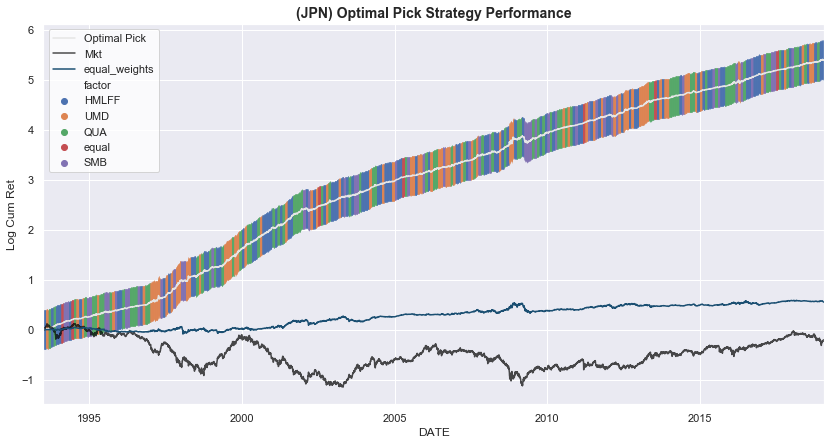

In [6]:
fig, ax = plt.subplots(1,1, figsize=(14, 7))

country = 'JPN'
po_dict[country].plot_log_cum_returns(ax)
ax.set_title('(%s) Optimal Pick Strategy Performance'% country,
             fontsize=14, fontweight=700)

fig.savefig(os.path.join(plot_location, 'portfolio_optimal_%s.pdf' % country),
            bbox_inches='tight')